In [22]:
import pandas as pd
import matplotlib.pyplot as plt

In [39]:
co2_levels = pd.read_csv('datasets/ch2_co2_levels.csv', parse_dates=True, index_col='datestamp')

In [40]:
co2_levels.head(7)

,co2
datestamp,
1958-03-29,316.1
1958-04-05,317.3
1958-04-12,317.6
1958-04-19,317.5
1958-04-26,316.4
1958-05-03,316.9
1958-05-10,NaN


In [25]:
co2_levels = co2_levels.set_index(['datestamp'])

In [41]:
co2_levels.isnull().sum()

co2    59
dtype: int64

In [42]:
co2_levels= co2_levels.fillna(method='bfill')

In [43]:
print(co2_levels.isnull().sum())

co2    0
dtype: int64


In [44]:
ma = co2_levels.rolling(window=52).mean().dropna()
ma.size

2233

In [45]:
mstd = co2_levels.rolling(window=52).std().dropna()
mstd.size

2233

In [46]:
ma['upper'] = ma['co2'] + (mstd['co2']* 2)

In [47]:
ma['lower'] = ma['co2'] - (mstd['co2'] * 2)

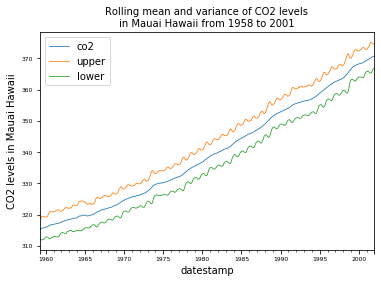

In [48]:
ax = ma.plot(linewidth=0.8, fontsize=6)
ax.set_ylabel('CO2 levels in Mauai Hawaii', fontsize=10)
ax.set_title('Rolling mean and variance of CO2 levels\nin Mauai Hawaii from 1958 to 2001', fontsize=10)
plt.show()

In [49]:
index_month = co2_levels.index.month

In [50]:
mean_co2_levels_by_month = co2_levels.groupby(index_month).mean()

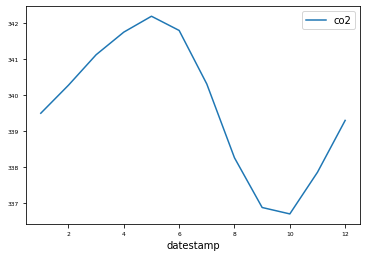

In [52]:
mean_co2_levels_by_month.plot(fontsize=6)

In [54]:
co2_levels.describe()

,co2
count,2284.000000
mean,339.657750
std,17.100899
min,313.000000
25%,323.975000
50%,337.700000
75%,354.500000
max,373.900000


In [56]:
co2_levels['co2'].min()

313.0

In [57]:
co2_levels['co2'].max()

373.9

No handles with labels found to put in legend.


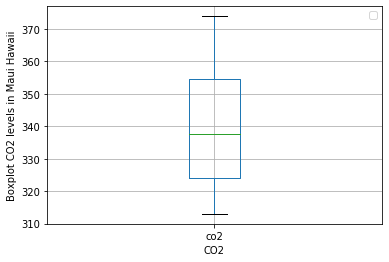

In [58]:
# Generate a boxplot
ax = co2_levels.boxplot()

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Boxplot CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

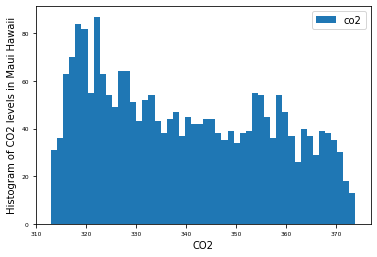

In [59]:
# Generate a histogram
ax = co2_levels.plot(kind='hist', bins=50, fontsize=6)

# Set the labels and display the plot
ax.set_xlabel('CO2', fontsize=10)
ax.set_ylabel('Histogram of CO2 levels in Maui Hawaii', fontsize=10)
plt.legend(fontsize=10)
plt.show()

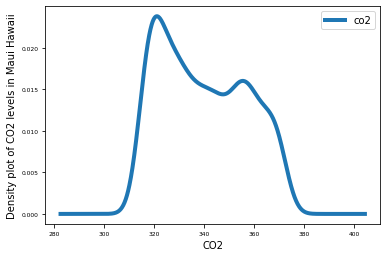

In [60]:
# Display density plot of CO2 levels values
ax = co2_levels.plot(kind='density', linewidth=4, fontsize=6)

# Annotate x-axis labels
ax.set_xlabel('CO2', fontsize=10)

# Annotate y-axis labels
ax.set_ylabel('Density plot of CO2 levels in Maui Hawaii', fontsize=10)

plt.show()